In [4]:
#drop the cas id
import pandas as pd
df = pd.read_csv(r"/home/arshad-ahmed/Documents/Mlops/US_visa_proj/EasyVisa.csv")
df.drop('case_id',inplace = True, axis = 1)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:

# Final Report

#     case_id column can be dropped as it is an ID.
#     requires_job_training column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
#     no_of_employees, prevailing_wage columns have outllier which should be handled.
#     continent columns has few unique values with very less count, which can be made as others
#     Target column case_status is imbalanced can be handled before model building.
#     year convert it to company age  


In [6]:
from datetime import date
current_year = date.today()
current_year = current_year.year

In [7]:
df["company_age"] = current_year - df['yr_of_estab']

In [8]:
df.drop('yr_of_estab',inplace=True ,axis=1)

In [9]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


In [10]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [i for i in df.columns if df[i].dtype == 'O']
print("Categorical features:",categorical_feature)
print("numeric features:",numeric_feature)

Categorical features: ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
numeric features: ['no_of_employees', 'prevailing_wage', 'company_age']


In [11]:
y = df['case_status']
if 'case_status' in list(df.columns):
    x = df.drop('case_status', axis =1 )


In [12]:
y

0           Denied
1        Certified
2           Denied
3           Denied
4        Certified
           ...    
25475    Certified
25476    Certified
25477    Certified
25478    Certified
25479    Certified
Name: case_status, Length: 25480, dtype: object

In [13]:

x

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19
...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,South,77092.5700,Year,Y,16
25476,Asia,High School,Y,N,3274,Northeast,279174.7900,Year,Y,18
25477,Asia,Master's,Y,N,1121,South,146298.8500,Year,N,114
25478,Asia,Master's,Y,Y,1918,West,86154.7700,Year,Y,137


In [14]:
import numpy as np
y = np.where(y=="Denied",0,1)

In [15]:
y

array([0, 1, 0, ..., 1, 1, 1])

In [16]:
#overcome the skewness we use power transformation

In [17]:
discerete = [feature for feature in numeric_feature if len(df[feature].unique())<=25]
continous  = [feature for feature in numeric_feature if len(df[feature].unique())>25]
print(discerete)
print(continous)

[]
['no_of_employees', 'prevailing_wage', 'company_age']


In [18]:
x[continous].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['company_age','no_of_employees']
xc = pt.fit_transform(x[transform_features])

In [20]:
xc = pd.DataFrame(xc,columns=transform_features)

In [21]:
xc

,company_age,no_of_employees
0,-0.952162,1.517300
1,-0.462942,0.030912
2,-1.075820,2.885076
3,1.629178,-1.343550
4,-0.733953,-0.432287
...,...,...
25475,-1.075820,0.079917
25476,-0.838640,0.235747
25477,1.547445,-0.413885
25478,1.683834,-0.111949


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

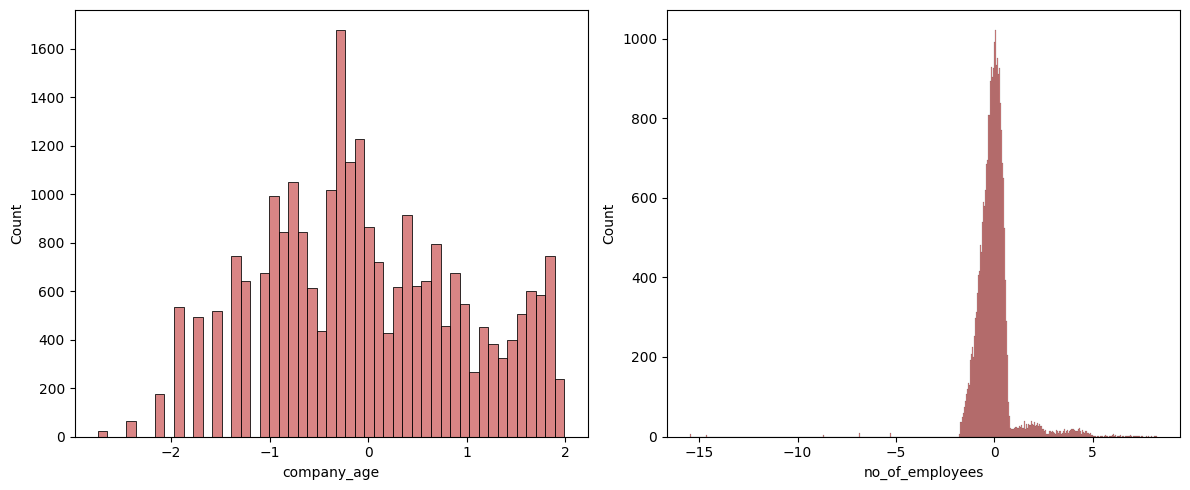

In [23]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=xc[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()


In [24]:
num_features = list(x.select_dtypes(exclude="object").columns)

In [25]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [26]:
x

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19
...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,South,77092.5700,Year,Y,16
25476,Asia,High School,Y,N,3274,Northeast,279174.7900,Year,Y,18
25477,Asia,Master's,Y,N,1121,South,146298.8500,Year,N,114
25478,Asia,Master's,Y,Y,1918,West,86154.7700,Year,Y,137


In [27]:
k = preprocessor.fit_transform(x)

In [28]:
k

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

In [29]:
x = k

In [30]:
from imblearn.combine import SMOTEENN,SMOTETomek
smt = SMOTEENN(random_state=42,sampling_strategy="minority")
X_res , y_res = smt.fit_resample(x,y)

In [31]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [32]:
#Classification models

In [33]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [37]:


def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc



In [35]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [34]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [38]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9522
- F1 score: 0.9478
- Precision: 0.9561
- Recall: 0.9397
- Roc Auc Score: 0.9513


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9214
- F1 score: 0.9139
- Precision: 0.9252
- Recall: 0.9029
- Roc Auc Score: 0.9201


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8893
- F1 score: 0.8799
- Precision: 0.8775
- Recall: 0.8823
- Roc Auc Score: 0.8888
----------------------------------
Model performance for Test set
- Accuracy: 0.8856
- F1 score: 0.8770
- Precision: 0.8716
- Recall: 0.8826
- Roc Auc Score: 0.8854


Logistic Regression
Model performance for Training 

/home/arshad-ahmed/anaconda3/envs/visa/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9653
- F1 score: 0.9617
- Precision: 0.9763
- Recall: 0.9475
- Roc Auc Score: 0.9640
----------------------------------
Model performance for Test set
- Accuracy: 0.9299
- F1 score: 0.9227
- Precision: 0.9413
- Recall: 0.9048
- Roc Auc Score: 0.9281


XGBClassifier
Model performance for Training set
- Accuracy: 0.9812
- F1 score: 0.9795
- Precision: 0.9831
- Recall: 0.9759
- Roc Auc Score: 0.9808
----------------------------------
Model performance for Test set
- Accuracy: 0.9305
- F1 score: 0.9247
- Precision: 0.9262
- Recall: 0.9232
- Roc Auc Score: 0.9300


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.9548
- F1 score: 0.9511
- Precision: 0.9452
- Recall: 0.9571
- Roc Auc Score: 0.9549
----------------------------------
Model performance for Test set
- Accuracy: 0.9264
- F1 score: 0.9214
- Precision: 0.9097
- Recall: 0.9334
- Roc Auc Score: 0.9269


Support Vector Classifier
Model perfo

In [39]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.952199
5,XGBClassifier,0.930499
4,K-Neighbors Classifier,0.929912
6,CatBoosting Classifier,0.926393
1,Decision Tree,0.921408
2,Gradient Boosting,0.885630
7,Support Vector Classifier,0.870381
8,AdaBoost Classifier,0.858651
3,Logistic Regression,0.734018


In [40]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [41]:


# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]



In [42]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/home/arshad-ahmed/anaconda3/envs/visa/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.1s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.3s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.3s
[CV] END ....................max_depth=5, min_child_weight=3; total time=   0.2s
[CV] END ...................

/home/arshad-ahmed/anaconda3/envs/visa/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.5s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.6s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.6s
[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV] END ..max_depth=10, max_features=sqrt, n_e

/home/arshad-ahmed/anaconda3/envs/visa/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.4s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   0.4s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.5s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.5s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.5s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.5s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.5s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   0.3s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   0.5s
[CV] END ....algorithm=auto, n_neighbors=4, weights=distance; total time=   0.5s
[CV] END ....algorithm=auto, n_neighbors=4, weights=distance; total time=   0.5s
[CV] END .....algorithm=auto, n_neighbors=5, we

In [43]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9507
- F1 score: 0.9463
- Precision: 0.9530
- Recall: 0.9397
- Roc Auc Score: 0.9500


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9619
- F1 score: 0.9580
- Precision: 0.9757
- Recall: 0.9410
- Roc Auc Score: 0.9604


XGBClassifier
Model performance for Training set
- Accuracy: 0.9994
- F1 score: 0.9994
- Precision: 1.0000
- Recall: 0.9987
- Roc Auc Score: 0.9994
----------------------------------
Model performance for Test set
- Accuracy: 0.9405
- F1 score: 0.9353
- Precision: 0.9398
- Recall: 0.9308
- Roc Auc Score: 0.9398




In [44]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)


FINAL MODEL 'KNN'
Accuracy Score value: 0.9619
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1834
           1       0.98      0.94      0.96      1576

    accuracy                           0.96      3410
   macro avg       0.96      0.96      0.96      3410
weighted avg       0.96      0.96      0.96      3410



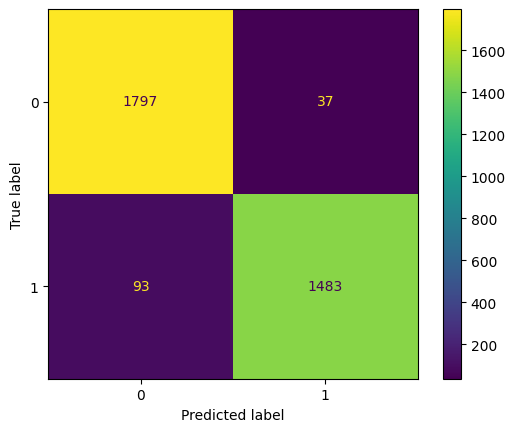

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)